In [35]:
from my_utils.base_data_handler import BaseDataHandler #type: ignore
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [36]:
handler = BaseDataHandler('data/raw/tracks_raw.csv')

In [37]:
handler.try_clean_column_names()
handler.df.nunique()

unnamed_0           114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [38]:
handler.df.drop(columns='unnamed_0', axis=1, inplace=True)
handler.try_add_col(target_col='target', func= lambda _: False)

(True, None)

In [39]:
handler.df.dropna(inplace=True)
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [40]:
sorted = handler.df.sort_values('track_genre')
sorted['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film',
       'pow

In [41]:
handler.df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [42]:
handler.try_add_col(target_col="duration_s", func=lambda x: x["duration_ms"]/1e3)

(True, None)

(<Figure size 1800x2500 with 15 Axes>,
 array([<Axes: title={'center': 'Outliers in popularity (percentile)'}, xlabel='popularity'>,
        <Axes: title={'center': 'Outliers in duration_ms (percentile)'}, xlabel='duration_ms'>,
        <Axes: title={'center': 'Outliers in danceability (percentile)'}, xlabel='danceability'>,
        <Axes: title={'center': 'Outliers in energy (percentile)'}, xlabel='energy'>,
        <Axes: title={'center': 'Outliers in key (percentile)'}, xlabel='key'>,
        <Axes: title={'center': 'Outliers in loudness (percentile)'}, xlabel='loudness'>,
        <Axes: title={'center': 'Outliers in mode (percentile)'}, xlabel='mode'>,
        <Axes: title={'center': 'Outliers in speechiness (percentile)'}, xlabel='speechiness'>,
        <Axes: title={'center': 'Outliers in acousticness (percentile)'}, xlabel='acousticness'>,
        <Axes: title={'center': 'Outliers in instrumentalness (percentile)'}, xlabel='instrumentalness'>,
        <Axes: title={'center': 'Ou

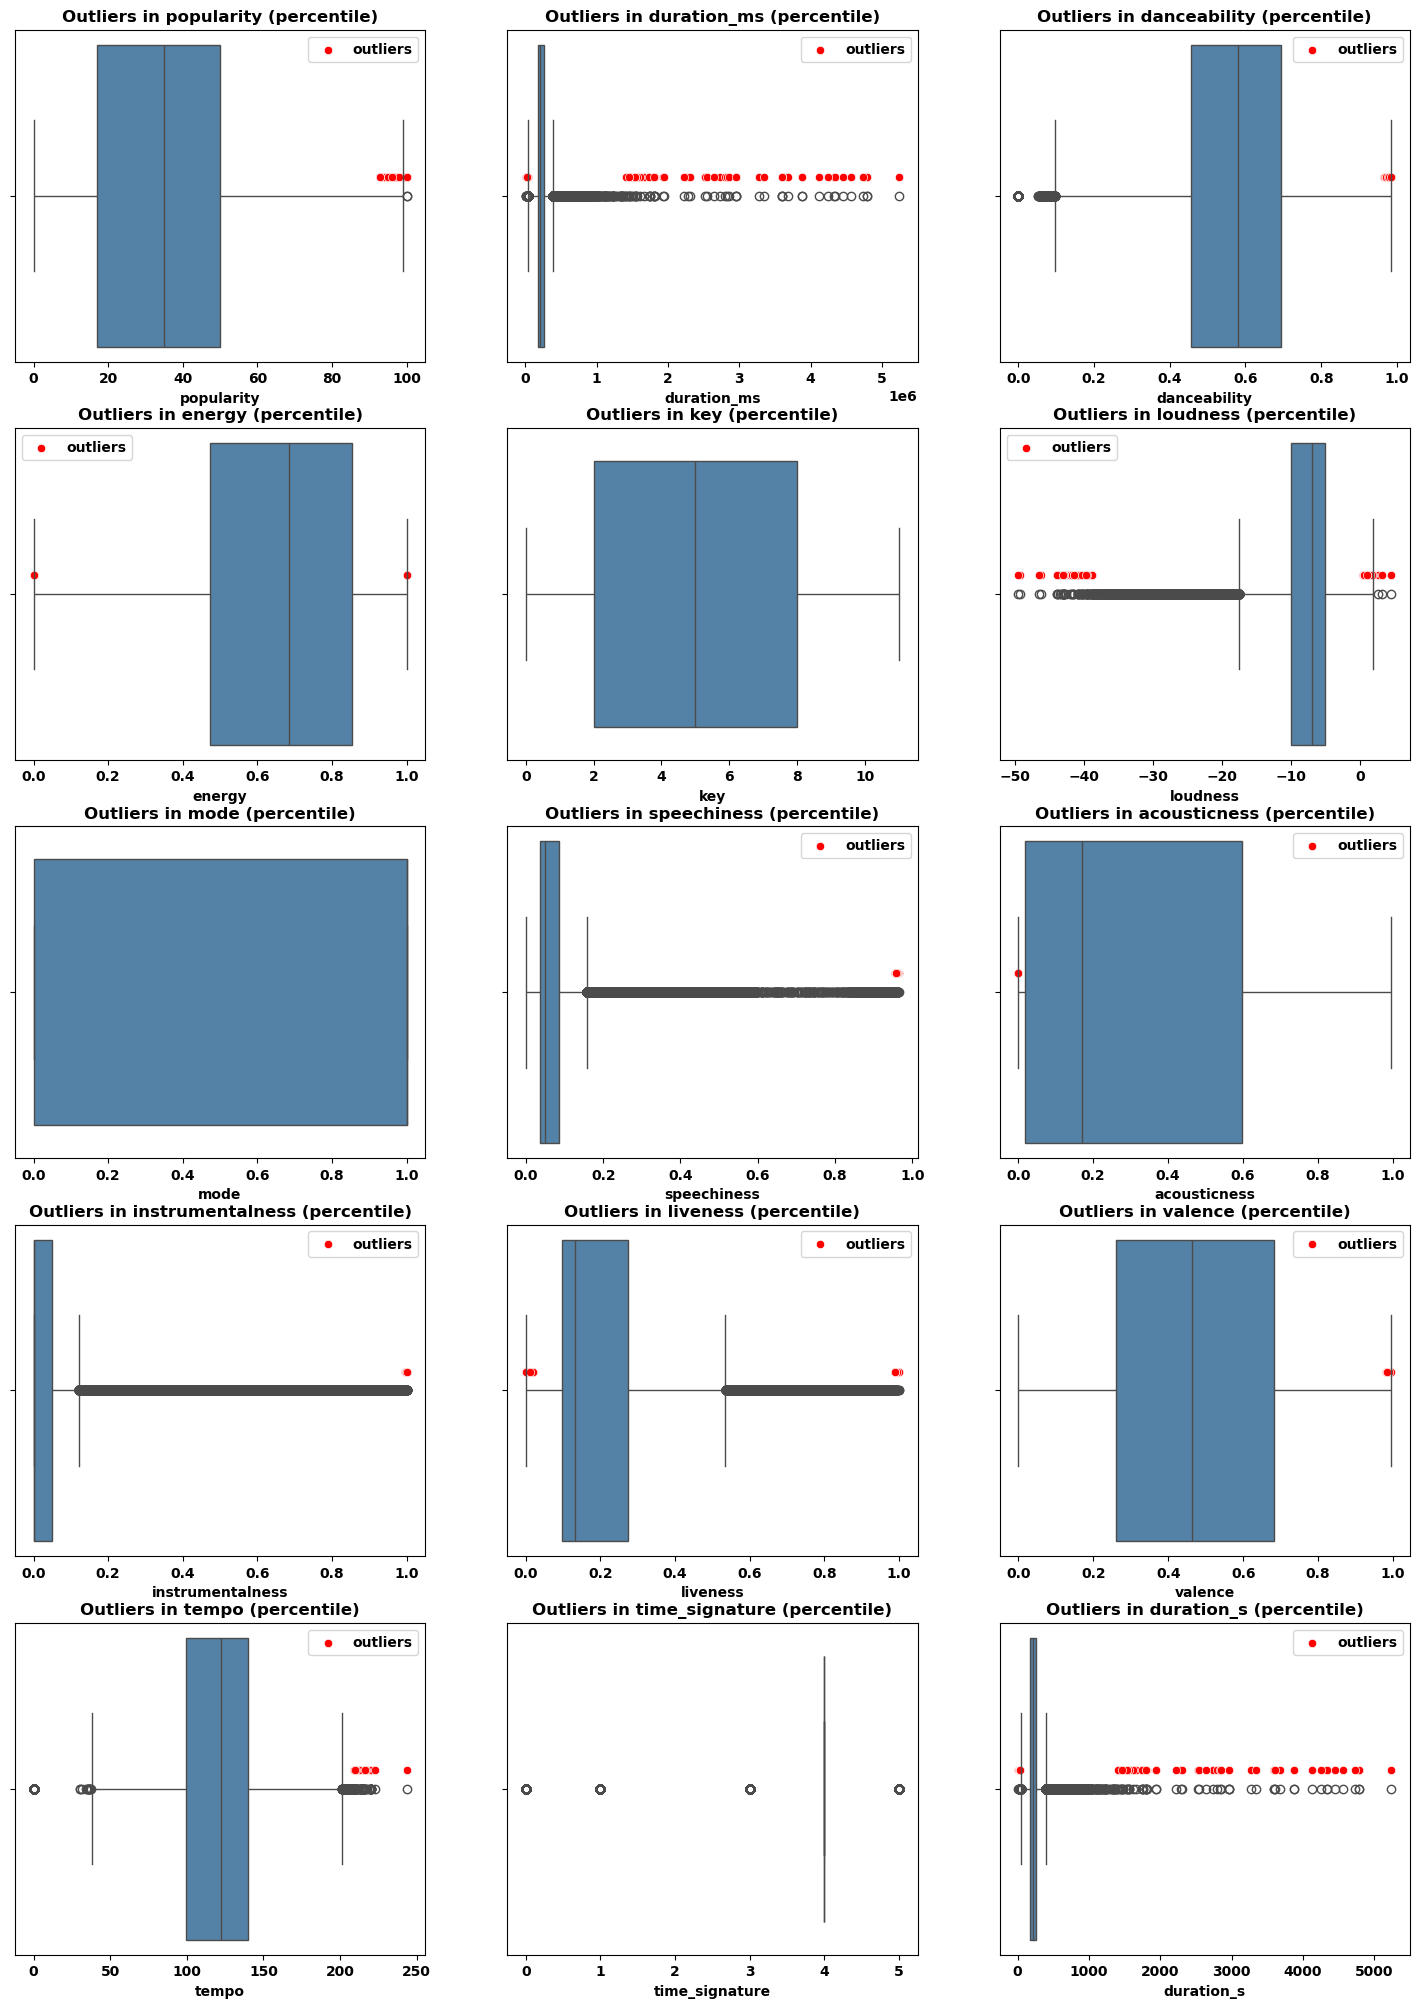

In [43]:
handler.get_outlier_case_study(upper_percentile=.9995, lower_percentile=.0005)

In [44]:
mask = handler.df['duration_ms'] > 3e6
handler.df[mask]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target,duration_s
10739,1HsXpX34EY1c1PaZQIMgdh,Deekline;Ed Solo;Serial Killaz,Welcome To The Jungle: Drum & Bass X Jungle: M...,"Welcome To The Jungle - Continuous DJ Mix, Pt. 1",11,3274999,False,0.6110,0.913000,1,...,0.0624,0.000645,0.034400,0.0598,0.41700,175.009,4,breakbeat,False,3274.999
10935,0LBIf9EFHuxmuNig4JHGZo,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,Crossing Wires 002 - Continuous DJ Mix,11,4789026,False,0.6970,0.632000,1,...,0.0451,0.008150,0.871000,0.0998,0.15100,121.055,4,breakbeat,False,4789.026
10984,0LBIf9EFHuxmuNig4JHGZo,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,Crossing Wires 002 - Continuous DJ Mix,11,4789026,False,0.6970,0.632000,1,...,0.0451,0.008150,0.871000,0.0998,0.15100,121.055,4,breakbeat,False,4789.026
13195,3se0UYprtkHthJEBuk1A5K,Mark Farina,Greenhouse Construction,Greenhouse Construction,12,4334721,False,0.8460,0.744000,10,...,0.0611,0.003710,0.335000,0.3130,0.53200,125.434,4,chicago-house,False,4334.721
13245,13hQAhg1owjTpTcI9xQc6c,Mark Farina,Live In Tokyo,Live In Tokyo - Continuous Mix,11,4339826,False,0.8060,0.582000,1,...,0.0874,0.008300,0.237000,0.3280,0.68600,128.368,4,chicago-house,False,4339.826
13344,3gFme8BdfTtFHxKmuTnSbj,Mark Farina,House of OM (DJ Mix),House of Om - Mark Farina - Continuous Mix,11,4447520,False,0.8610,0.805000,11,...,0.0711,0.005480,0.577000,0.1350,0.54500,129.306,4,chicago-house,False,4447.520
24348,6wypxnAvmv5zYewUX3VFDd,Seth Troxler,Seth Troxler - The Lab 03,The Lab 03 - Continuous DJ Mix Part 1,8,4730302,False,0.6840,0.656000,5,...,0.0633,0.019100,0.848000,0.1030,0.30100,123.180,4,detroit-techno,False,4730.302
24747,0nfqrZDDv09LW2U6KexnAg,Kevin Saunderson,History Elevate Remixed,Kevin Saunderson History Elevate - Continuous Mix,5,3676760,False,0.7150,0.901000,10,...,0.0497,0.004370,0.786000,0.0596,0.30400,130.008,4,detroit-techno,False,3676.760
27926,6eTDnsdPlRUyrTHqFj3l7W,Lenzman;Dan Stezo,NQ State of Mind,"NQ State of Mind, Vol. 1 - Continuous DJ Mix",15,4246206,True,0.5930,0.924000,1,...,0.0899,0.003690,0.022100,0.5340,0.24200,173.938,4,drum-and-bass,False,4246.206
45063,0PINNy1r5eEILOuHpnjl5d,Estas Tonne,Internal Flight (Remastered),Internal Flight (Remastered),47,3876276,False,0.3000,0.640000,4,...,0.0367,0.946000,0.893000,0.0783,0.21200,159.624,4,guitar,False,3876.276


In [45]:
no_outliers_df = handler.get_no_outliers_df(upper_percentile=.9995, lower_percentile=.0005)
handler.df = no_outliers_df.copy()
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113249 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113249 non-null  object 
 1   artists           113249 non-null  object 
 2   album_name        113249 non-null  object 
 3   track_name        113249 non-null  object 
 4   popularity        113249 non-null  int64  
 5   duration_ms       113249 non-null  int64  
 6   explicit          113249 non-null  bool   
 7   danceability      113249 non-null  float64
 8   energy            113249 non-null  float64
 9   key               113249 non-null  int64  
 10  loudness          113249 non-null  float64
 11  mode              113249 non-null  int64  
 12  speechiness       113249 non-null  float64
 13  acousticness      113249 non-null  float64
 14  instrumentalness  113249 non-null  float64
 15  liveness          113249 non-null  float64
 16  valence           113249 

E:\Luca\Machine-Learning course\my_utils\my_utils\base_data_handler.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df.dropna(inplace=True)


(<Figure size 1800x2500 with 15 Axes>,
 array([<Axes: title={'center': 'Outliers in popularity (percentile)'}, xlabel='popularity'>,
        <Axes: title={'center': 'Outliers in duration_ms (percentile)'}, xlabel='duration_ms'>,
        <Axes: title={'center': 'Outliers in danceability (percentile)'}, xlabel='danceability'>,
        <Axes: title={'center': 'Outliers in energy (percentile)'}, xlabel='energy'>,
        <Axes: title={'center': 'Outliers in key (percentile)'}, xlabel='key'>,
        <Axes: title={'center': 'Outliers in loudness (percentile)'}, xlabel='loudness'>,
        <Axes: title={'center': 'Outliers in mode (percentile)'}, xlabel='mode'>,
        <Axes: title={'center': 'Outliers in speechiness (percentile)'}, xlabel='speechiness'>,
        <Axes: title={'center': 'Outliers in acousticness (percentile)'}, xlabel='acousticness'>,
        <Axes: title={'center': 'Outliers in instrumentalness (percentile)'}, xlabel='instrumentalness'>,
        <Axes: title={'center': 'Ou

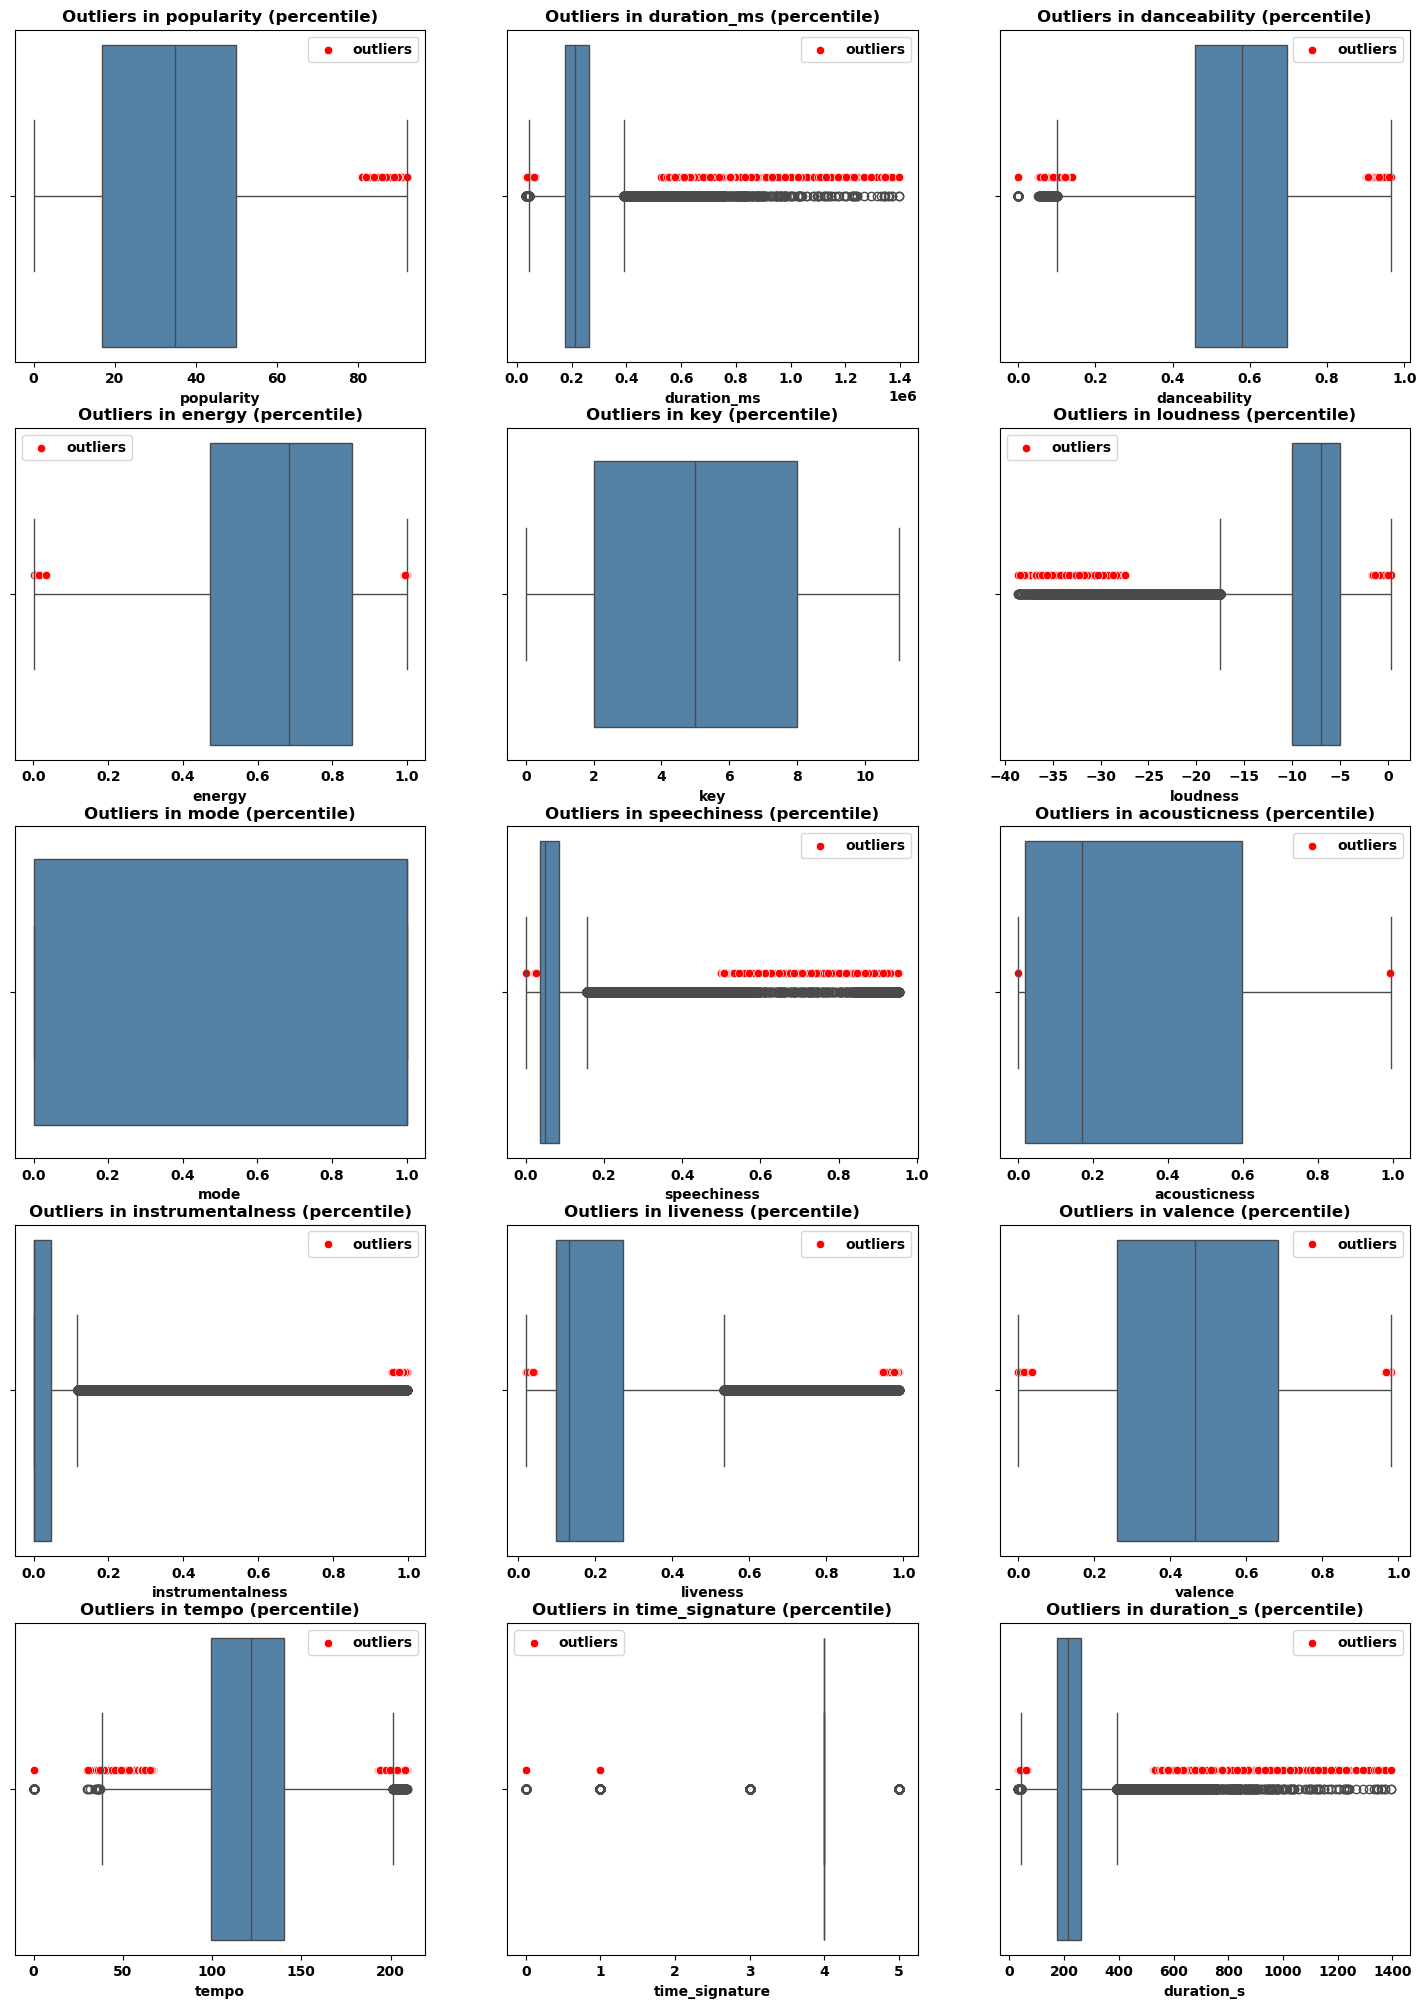

In [46]:
handler.get_outlier_case_study()

In [47]:
mask = handler.df['time_signature'] < 1
handler.df['time_signature'] = handler.df['time_signature'].replace(0,4)
handler.df[mask]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target,duration_s
2926,0jdfbvSdaWvxfAlD20TtNc,Yaşlı Amca,Akşamüstü,Sanki Yapamadım,44,213198,False,0.442,0.56700,8,...,0.0516,0.238000,0.000325,0.0852,0.639,138.616,4,alt-rock,False,213.198
4131,59gg6zQhSKGVnkT3hWAY3l,Max Richter;Lang Lang,Voyager - Essential Max Richter,The Departure,64,151506,False,0.000,0.03620,0,...,0.0000,0.994000,0.940000,0.0958,0.000,0.000,4,ambient,False,151.506
4379,4acmzQsAeMJa5sGFSog7fu,Dario Marianelli;Jack Liebeck;Benjamin Wallfisch,Jane Eyre - Original Motion Picture Soundtrack,The End of Childhood (feat. Jack Liebeck),55,73266,False,0.000,0.04450,0,...,0.0000,0.972000,0.972000,0.0873,0.000,0.000,4,ambient,False,73.266
4664,1Kb2DqjHRvOcT5xeWtz3t5,Sylvain Chauveau,Des Plumes Dans La Tête,Ferme Les Yeux,53,68493,False,0.000,0.03230,2,...,0.0000,0.994000,0.973000,0.0922,0.000,0.000,4,ambient,False,68.493
26910,7HSc2wpHlXKIl8SCZK7zsP,Benny Martin,Here Comes the Sun (Piano Instrumental),Here Comes the Sun (Piano Instrumental),18,203705,False,0.329,0.06070,9,...,0.0507,0.994000,0.880000,0.0858,0.421,93.948,4,disney,False,203.705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101980,4kbZ4InJwTJlITcyUXsP1y,Baby Sleep Lullaby Academy,Natural White Noise to Help Your Baby Sleep – ...,Vacum Cleaner,32,300000,False,0.000,0.00593,5,...,0.0000,0.908000,0.973000,0.9600,0.000,0.000,4,sleep,False,300.000
101993,6H0kAiSAFB84jX7dgEDWd6,Rain Sounds,Rain,Rain: Natural Recording,32,84219,False,0.000,0.02540,8,...,0.0000,0.000002,0.838000,0.3390,0.000,0.000,4,sleep,False,84.219
112172,0jdfbvSdaWvxfAlD20TtNc,Yaşlı Amca,Akşamüstü,Sanki Yapamadım,44,213198,False,0.442,0.56700,8,...,0.0516,0.238000,0.000325,0.0852,0.639,138.616,4,turkish,False,213.198
113428,5EYzrykQ95uOmepteDi9KT,El Ruido Blanco;Soñoliento Juan;Mantra para Do...,Aire Acondicionado de Ruido Blanco,Aire de verano,27,128000,False,0.000,0.18800,8,...,0.0000,0.139000,0.339000,0.1220,0.000,0.000,4,world-music,False,128.000


In [48]:
handler.df.drop_duplicates(subset=['track_id'], inplace=True)
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89094 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89094 non-null  object 
 1   artists           89094 non-null  object 
 2   album_name        89094 non-null  object 
 3   track_name        89094 non-null  object 
 4   popularity        89094 non-null  int64  
 5   duration_ms       89094 non-null  int64  
 6   explicit          89094 non-null  bool   
 7   danceability      89094 non-null  float64
 8   energy            89094 non-null  float64
 9   key               89094 non-null  int64  
 10  loudness          89094 non-null  float64
 11  mode              89094 non-null  int64  
 12  speechiness       89094 non-null  float64
 13  acousticness      89094 non-null  float64
 14  instrumentalness  89094 non-null  float64
 15  liveness          89094 non-null  float64
 16  valence           89094 non-null  float64
 1

In [49]:
handler.df.dropna(inplace=True)

cols_to_normalize = ['danceability','energy','valence','tempo','loudness','acousticness','instrumentalness','liveness','speechiness']

mask = [col for col in handler.df.columns if col in cols_to_normalize]

scaler = StandardScaler()
handler.df[mask] = scaler.fit_transform(handler.df[mask])


In [50]:
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89094 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89094 non-null  object 
 1   artists           89094 non-null  object 
 2   album_name        89094 non-null  object 
 3   track_name        89094 non-null  object 
 4   popularity        89094 non-null  int64  
 5   duration_ms       89094 non-null  int64  
 6   explicit          89094 non-null  bool   
 7   danceability      89094 non-null  float64
 8   energy            89094 non-null  float64
 9   key               89094 non-null  int64  
 10  loudness          89094 non-null  float64
 11  mode              89094 non-null  int64  
 12  speechiness       89094 non-null  float64
 13  acousticness      89094 non-null  float64
 14  instrumentalness  89094 non-null  float64
 15  liveness          89094 non-null  float64
 16  valence           89094 non-null  float64
 1

In [51]:
handler.try_update_og_df()
handler.try_save_to_csv()

(True, None)